In [ ]:
### Phase 1: Dataset Exploration

In [1]:
# - Load dataset və basic info
import pandas as pd
df=pd.read_csv("dataset-of-10s.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


In [2]:
# - Check target distribution (hit vs flop)
df['target'].value_counts()

target
1    3199
0    3199
Name: count, dtype: int64

In [3]:
# - Identify missing values
df.isnull().sum()    

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [4]:
# - Check data types
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [ ]:
### Phase 2: Data Cleaning

In [5]:
# - Handle null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index([], dtype='object')

In [6]:
# - Remove duplicates
df = df.drop_duplicates()

In [7]:
df.shape

(6398, 19)

In [ ]:
# - Fix data type issues
# df['date'] = pd.to_datetime(df['date'])   Tarix tipini düzəltmək
# df['number'] = df['number'].astype(float)   number dəyərləri çevirmək
# df['is_hit'] = df['is_hit'].map({'Yes': 1, 'No': 0})  Binar kateqorik dəyişəni rəqəmlərə çevirmək

In [8]:
# - Outlier detection
Q1 = df['energy'].quantile(0.25)
Q3 = df['energy'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['energy'] < lower_bound) | (df['energy'] > upper_bound)]
print("Outlier sayı:", outliers.shape[0])

Outlier sayı: 142


In [9]:
from scipy.stats import zscore

df['z_score'] = zscore(df['energy'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print("Outlier sayı:", outliers.shape[0])

Outlier sayı: 0


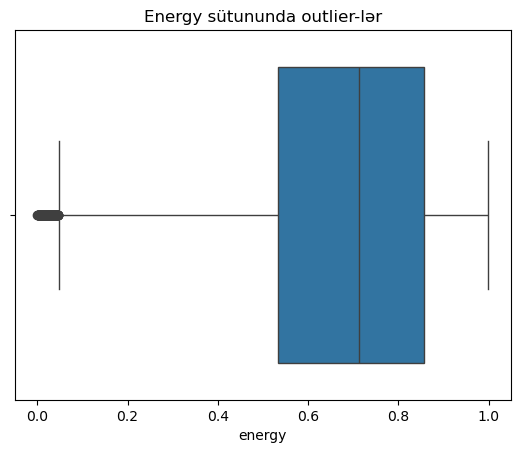

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['energy'])  # Məsələn: 'energy' sütunu üçün
plt.title('Energy sütununda outlier-lər')
plt.show()

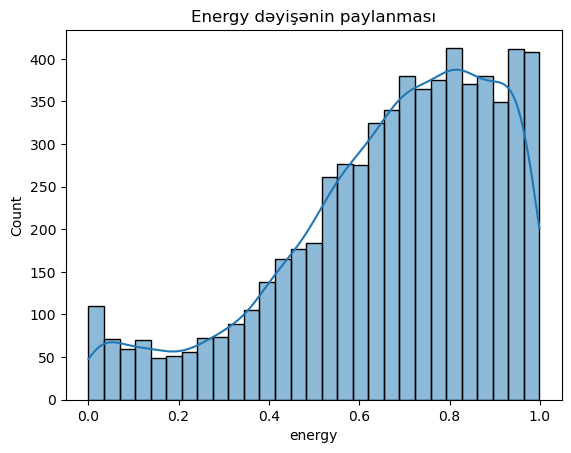

In [11]:
sns.histplot(df['energy'], kde=True)
plt.title('Energy dəyişənin paylanması')
plt.show()

In [12]:
df_cleaned = df[df['energy'] >= lower_bound]

print(f"Təmizlənmiş sətr sayı: {len(df_cleaned)}")

Təmizlənmiş sətr sayı: 6256


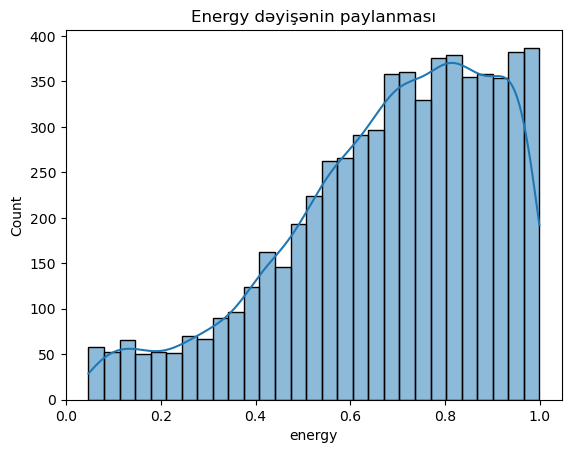

In [13]:
sns.histplot(df_cleaned['energy'], kde=True)
plt.title('Energy dəyişənin paylanması')
plt.show()

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col} üçün outlier sayı: {len(outliers)}")

danceability üçün outlier sayı: 0
energy üçün outlier sayı: 142
key üçün outlier sayı: 0
loudness üçün outlier sayı: 555
mode üçün outlier sayı: 0
speechiness üçün outlier sayı: 730
acousticness üçün outlier sayı: 663
instrumentalness üçün outlier sayı: 1440
liveness üçün outlier sayı: 401
valence üçün outlier sayı: 0
tempo üçün outlier sayı: 7
duration_ms üçün outlier sayı: 474
time_signature üçün outlier sayı: 599
chorus_hit üçün outlier sayı: 325
sections üçün outlier sayı: 176
target üçün outlier sayı: 0
z_score üçün outlier sayı: 142


In [ ]:
### Phase 3: EDA (Exploratory Data Analysis)

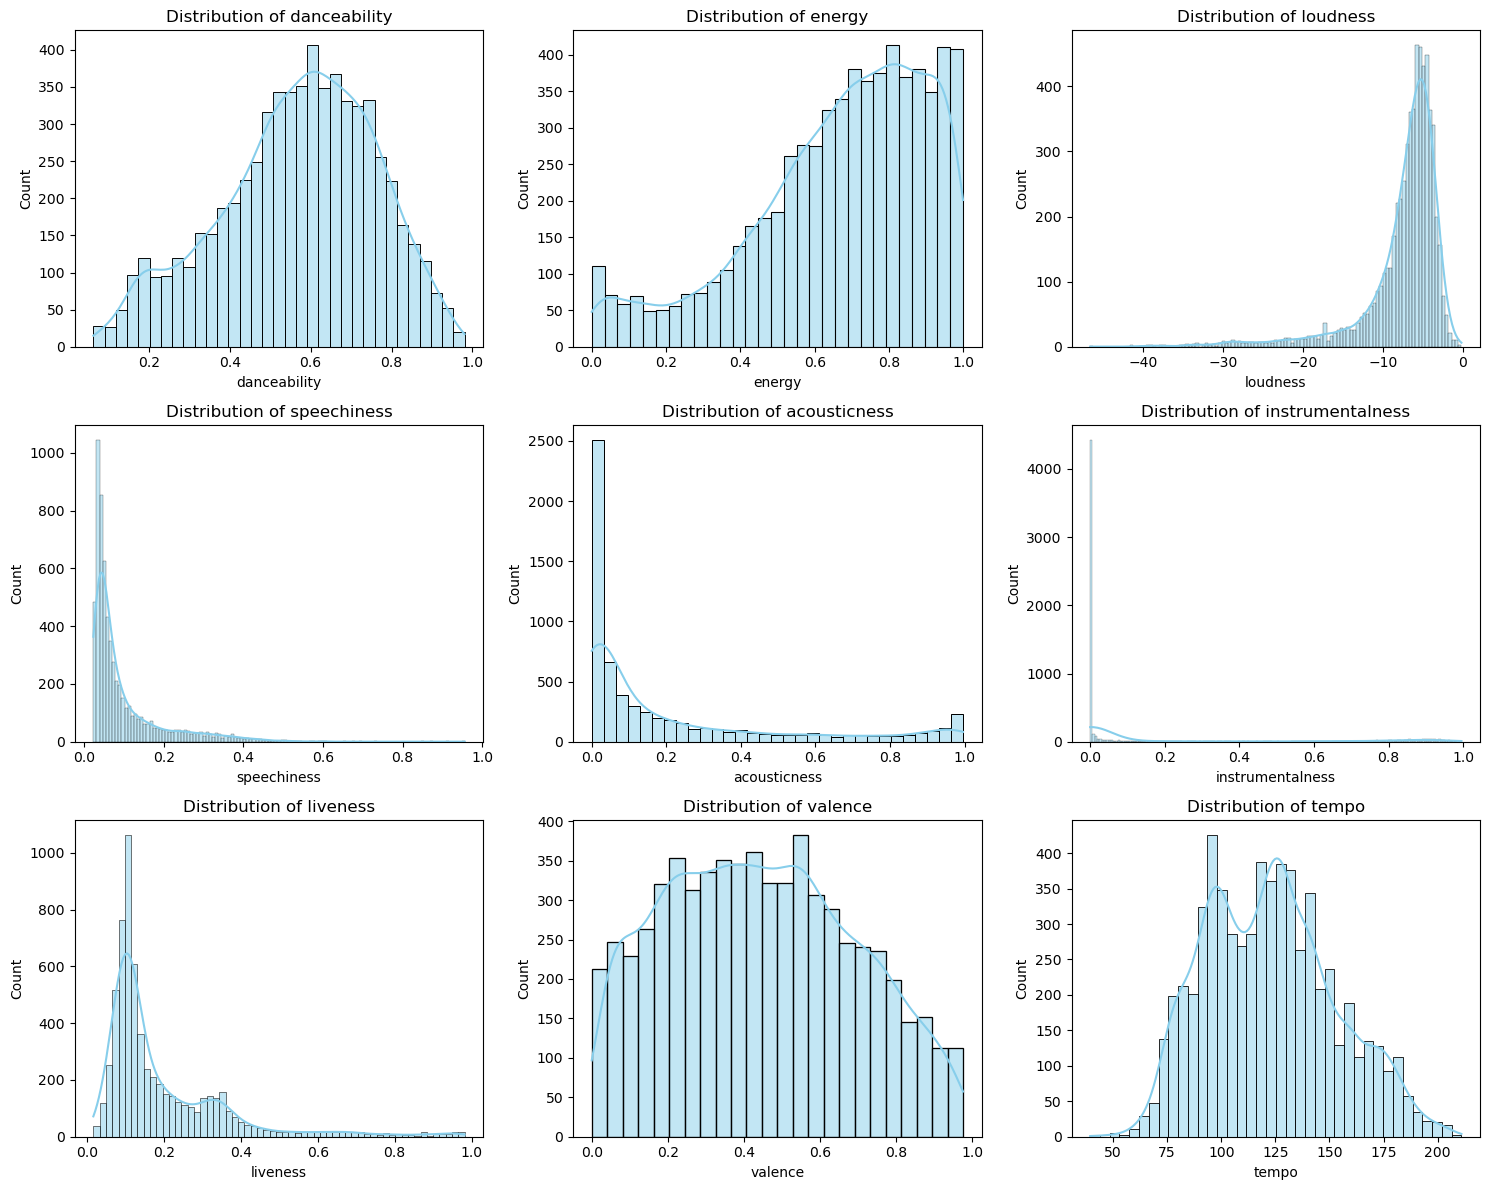

In [19]:
# - Audio features distribution
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from scipy.stats.mstats import winsorize

In [16]:
# 0-ları çox kiçik ədədə dəyişmək lazımdır (log(0) yoxdur)
df['instrumentalness'] = df['instrumentalness'].replace(0, 1e-5)
df['instrumentalness'] = np.log(df['instrumentalness'])

In [17]:
# Winsorize tətbiqi – 5% aşağı və yuxarı limit
winsor_cols = ['speechiness', 'acousticness', 'liveness']

for col in winsor_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

In [18]:
# IQR metodu ilə tempo üçün lower və upper limitləri hesablamaq
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Kənar dəyərləri silmək
df = df[(df['tempo'] >= lower) & (df['tempo'] <= upper)]

In [19]:
df['energy'] = winsorize(df['energy'], limits=[0.05, 0.05])

In [20]:
df['loudness'] = winsorize(df['loudness'], limits=[0.05, 0.05])

In [21]:
Q1 = df['duration_ms'].quantile(0.25)
Q3 = df['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
median = df['duration_ms'].median()

df['duration_ms'] = df['duration_ms'].apply(lambda x: median if x < lower or x > upper else x)

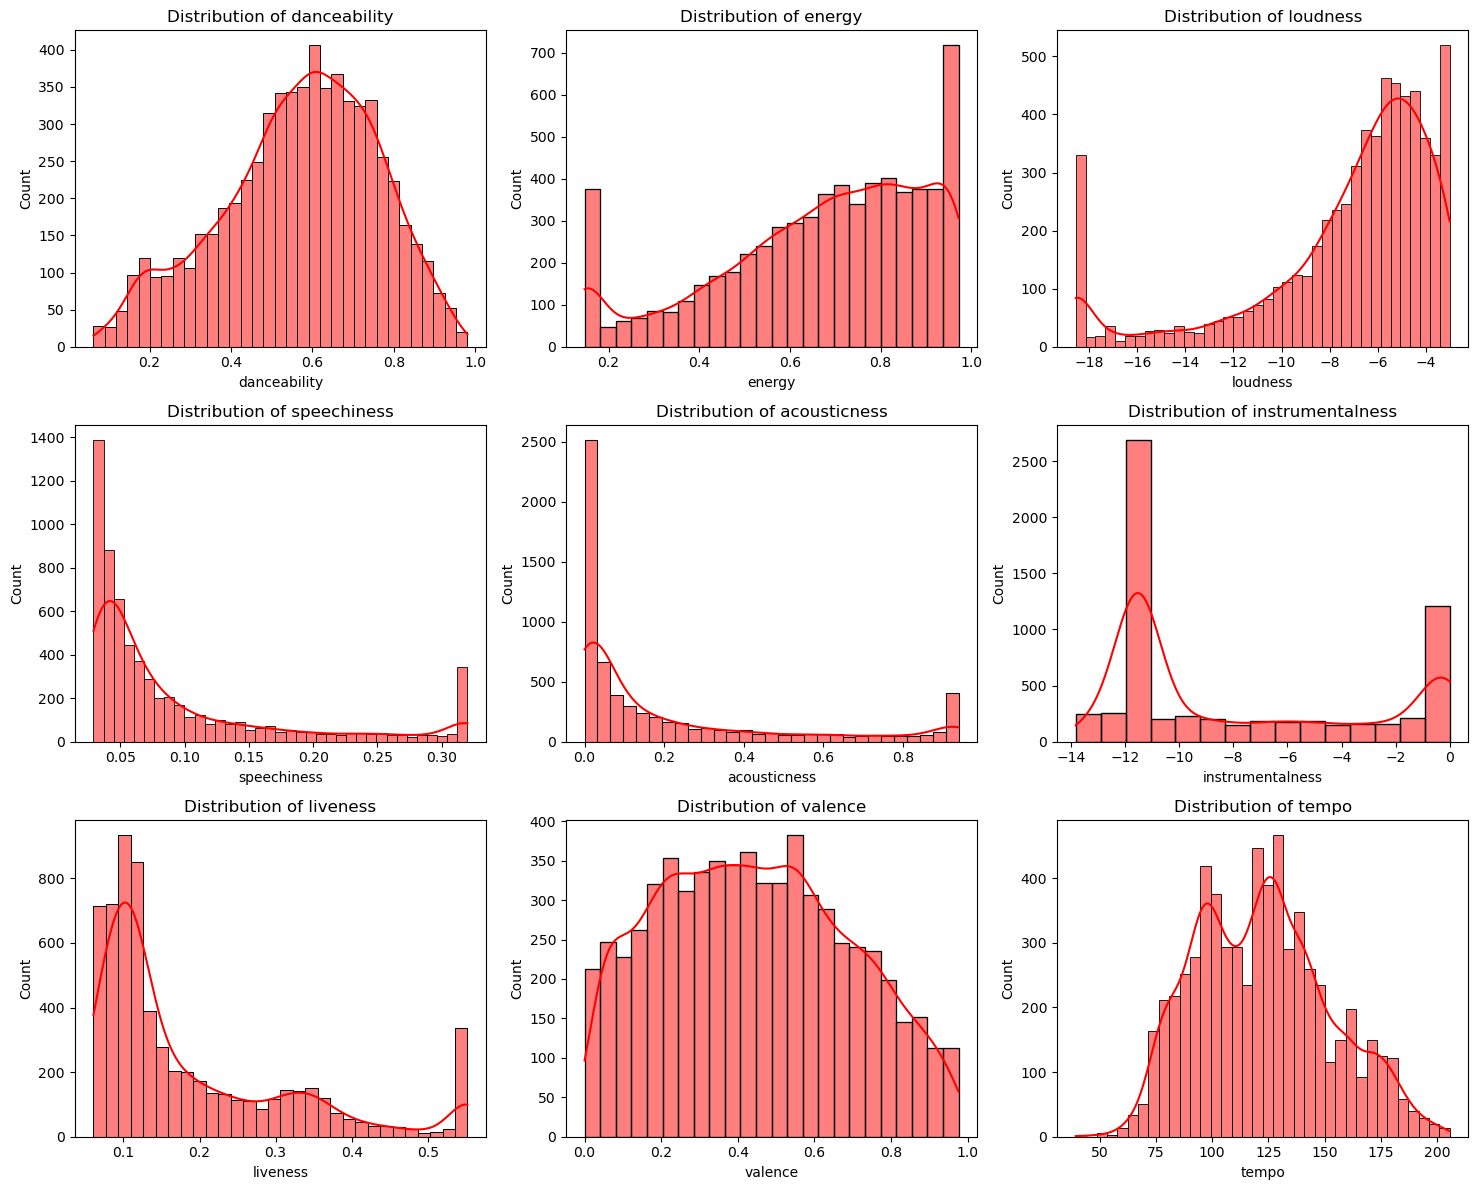

In [23]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='red')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

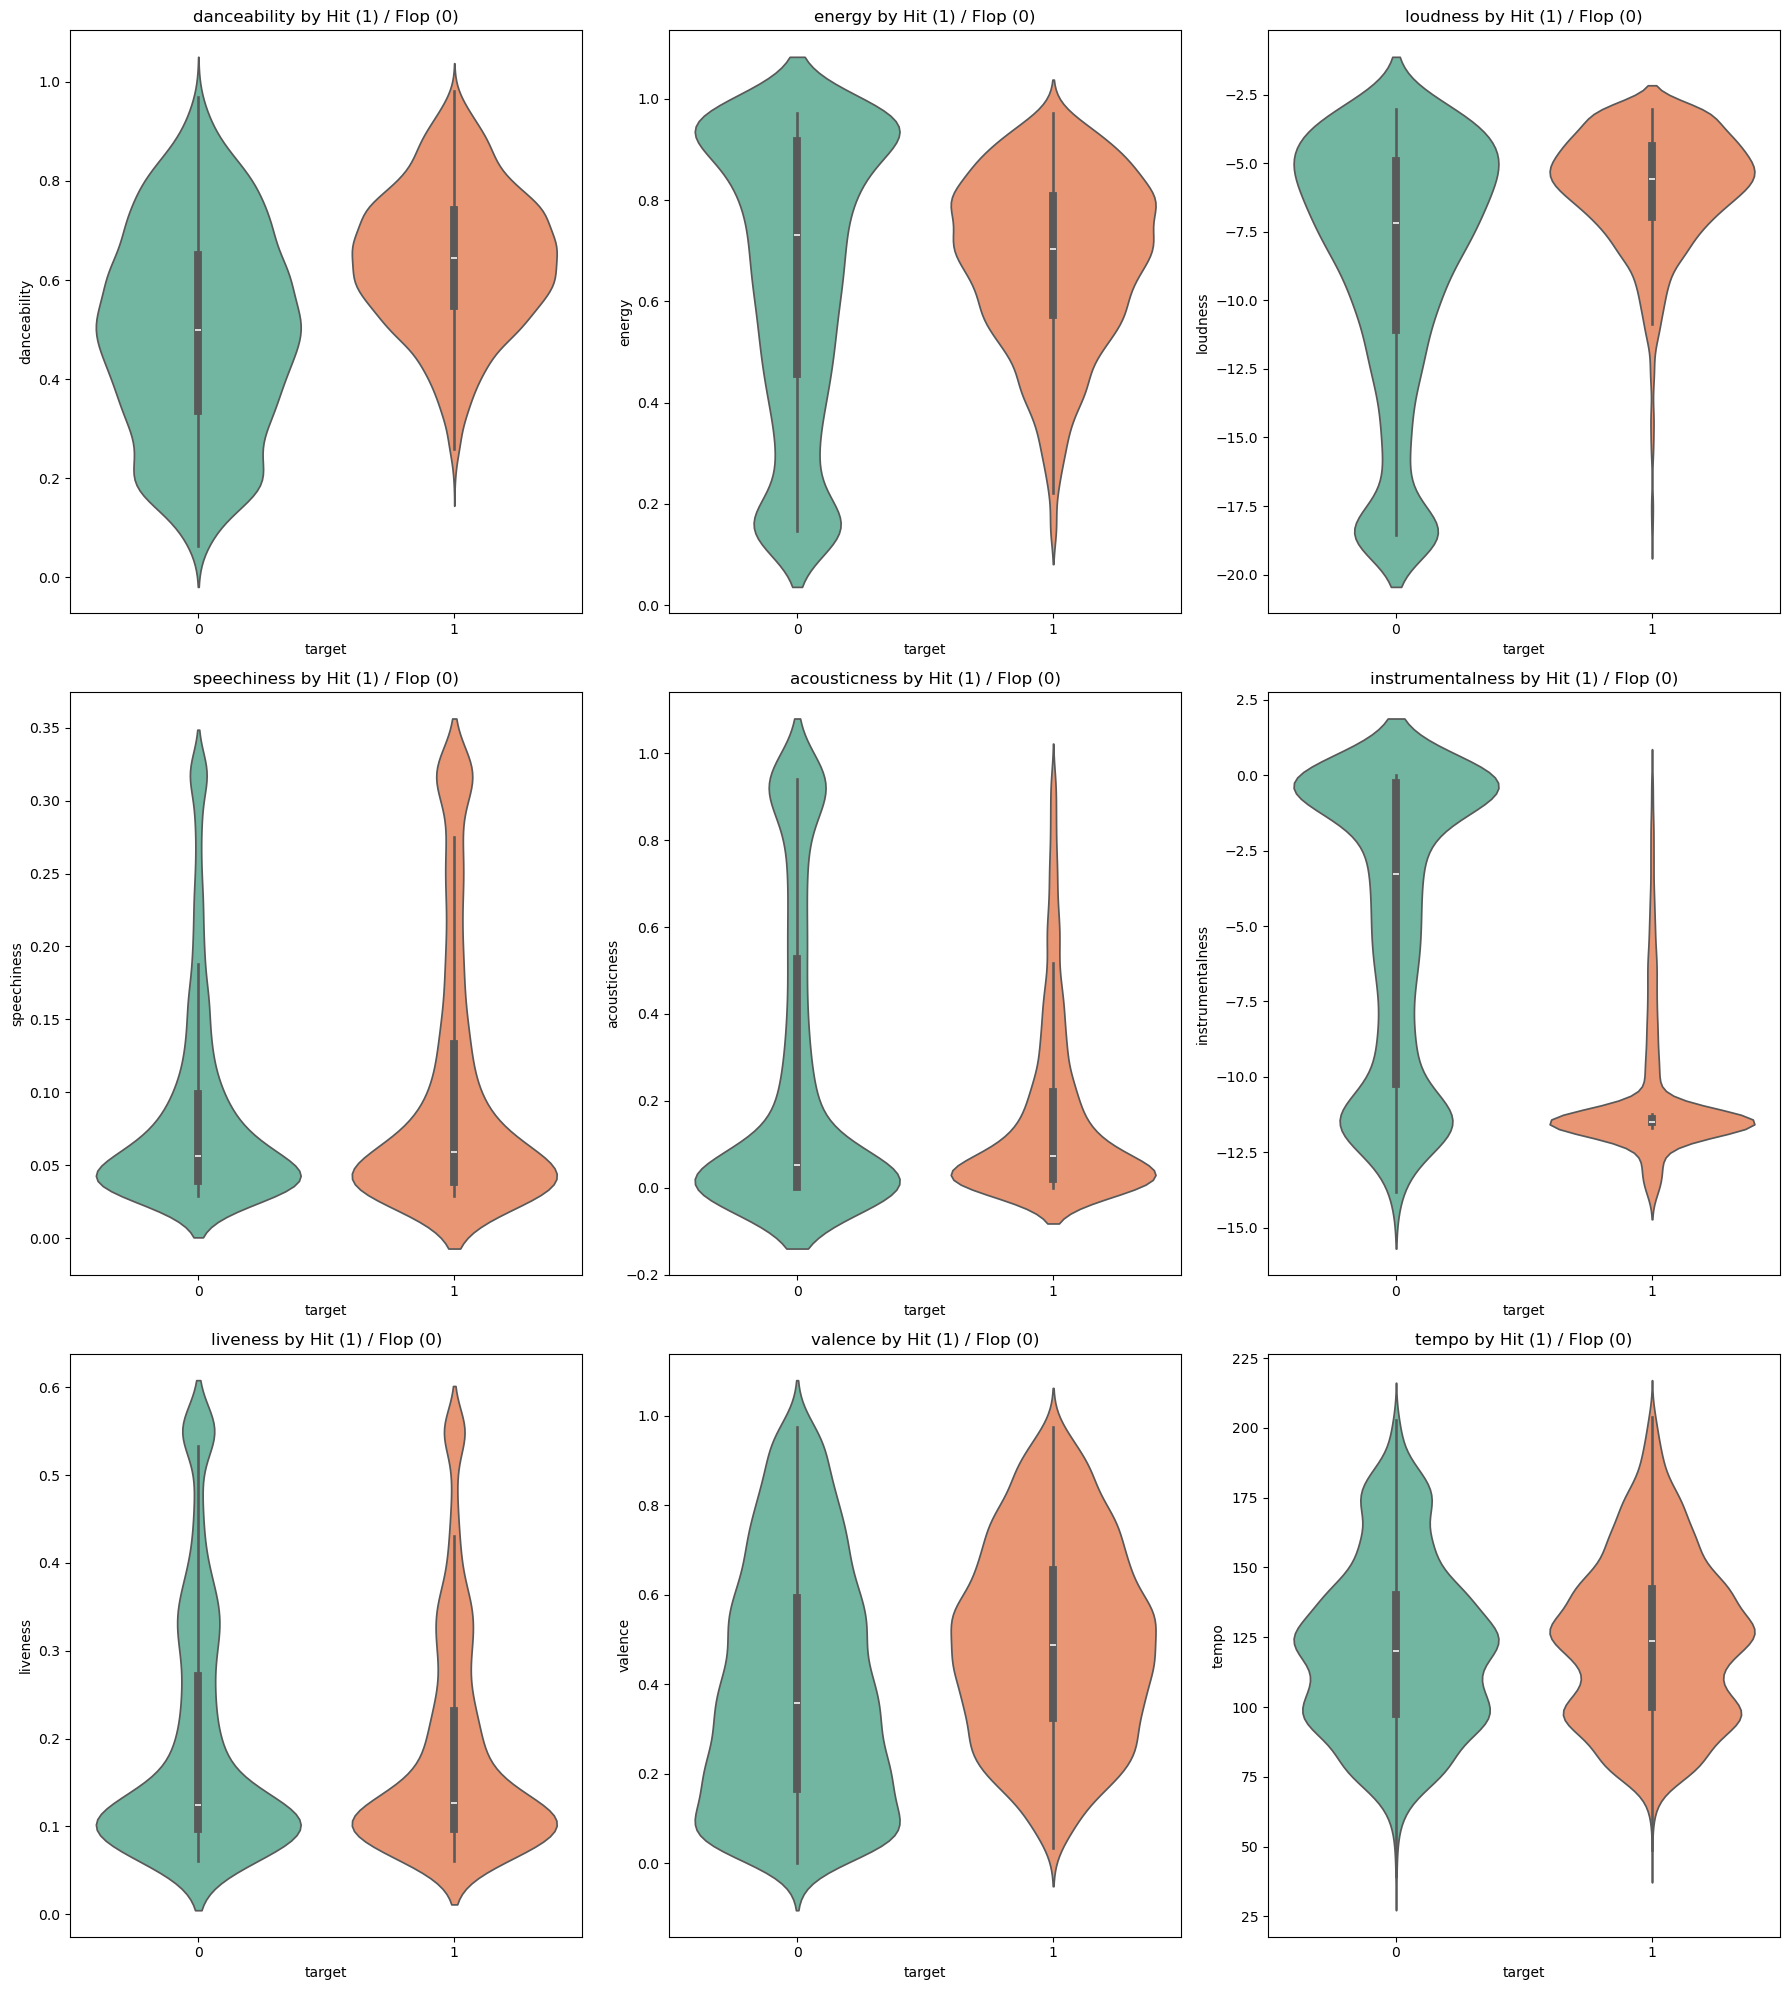

In [25]:
# - Hit vs Flop comparison
import seaborn as sns
import matplotlib.pyplot as plt

audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(18, 20))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='target', y=feature, data=df, hue='target', palette='Set2', legend=False)
    plt.title(f'{feature} by Hit (1) / Flop (0)')
plt.tight_layout()
plt.show()

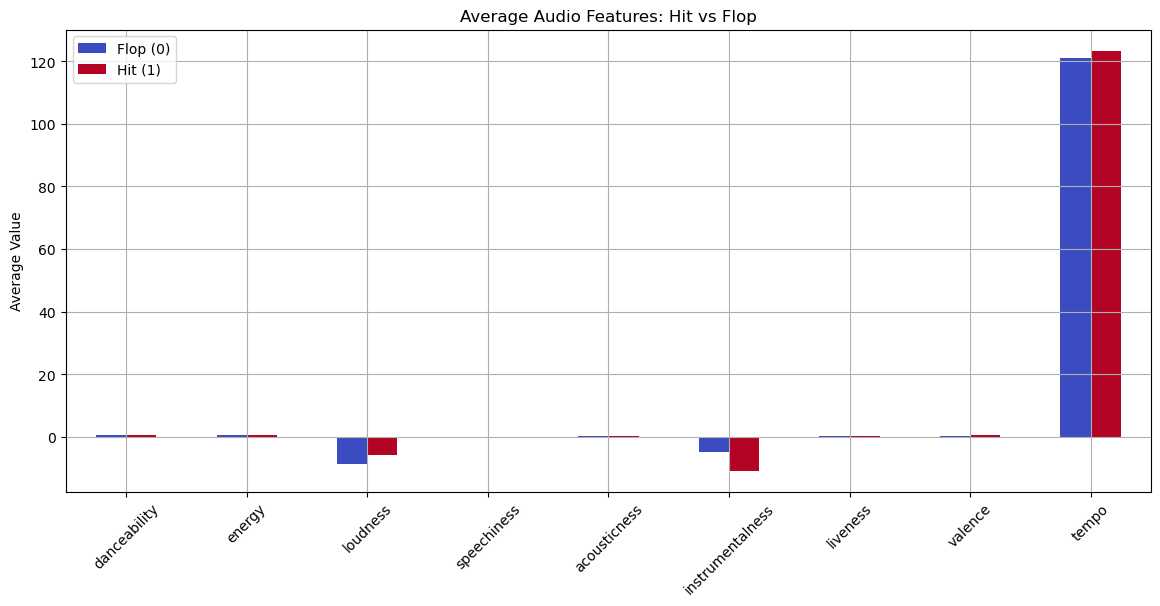

In [26]:
# Hit və Flop üçün orta dəyərləri çıxar
comparison_df = df.groupby('target')[audio_features].mean().T
comparison_df.columns = ['Flop (0)', 'Hit (1)']

# Vizual olaraq göstər
comparison_df.plot(kind='bar', figsize=(14, 6), colormap='coolwarm')
plt.title("Average Audio Features: Hit vs Flop")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

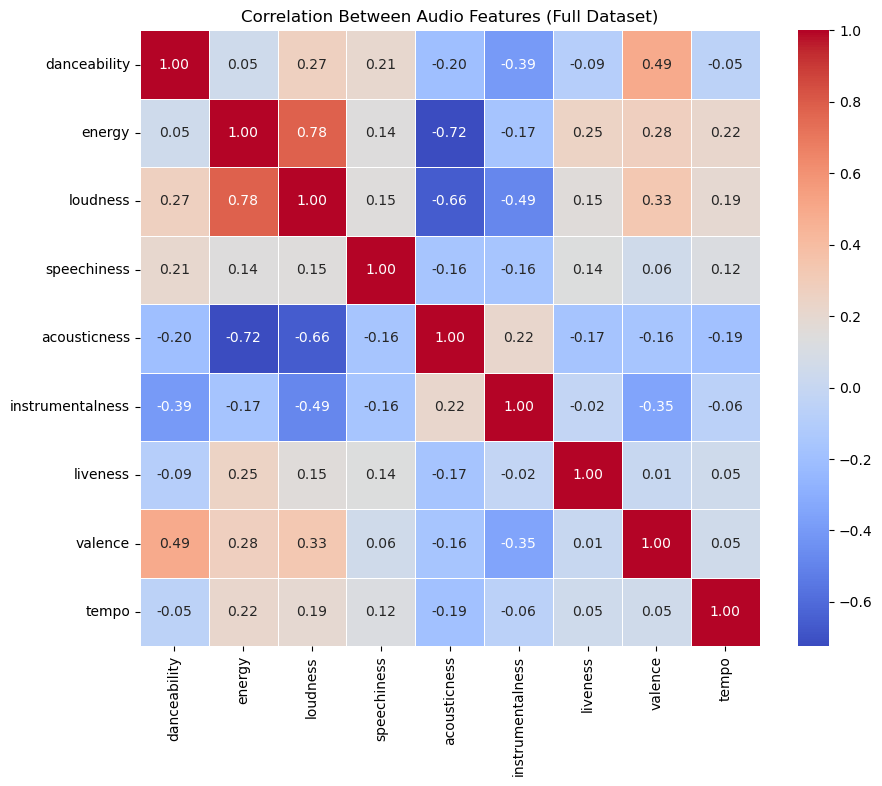

In [27]:
# - Correlation analysis
corr_matrix = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Audio Features (Full Dataset)")
plt.show()

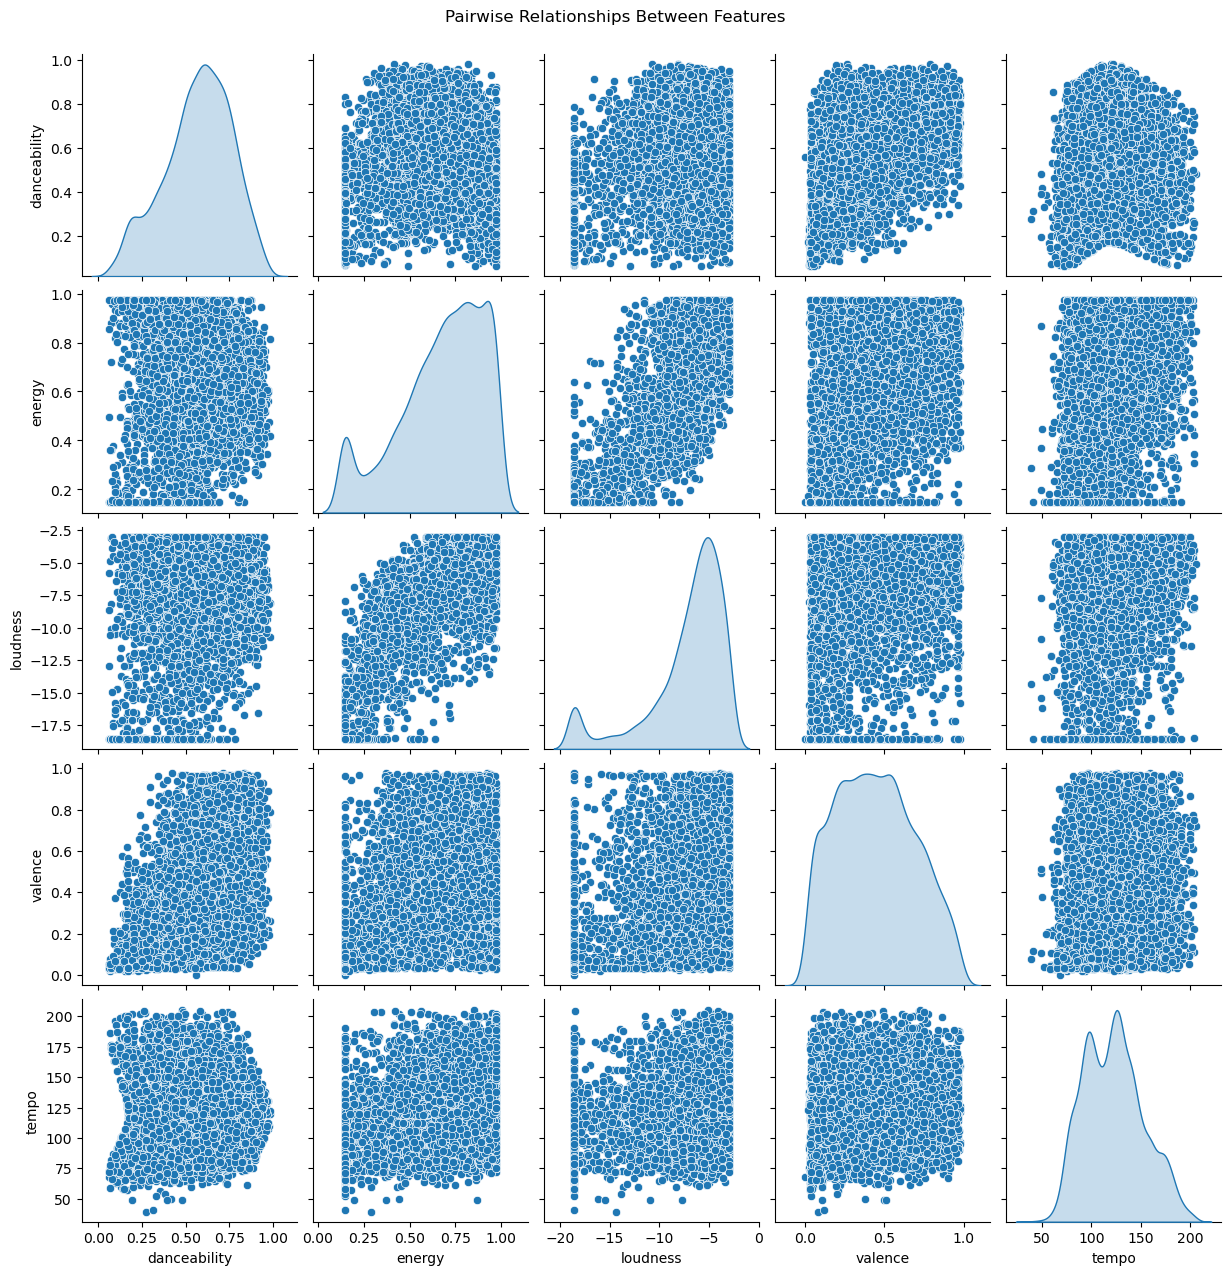

In [28]:
# - Feature relationships
selected_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']

sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

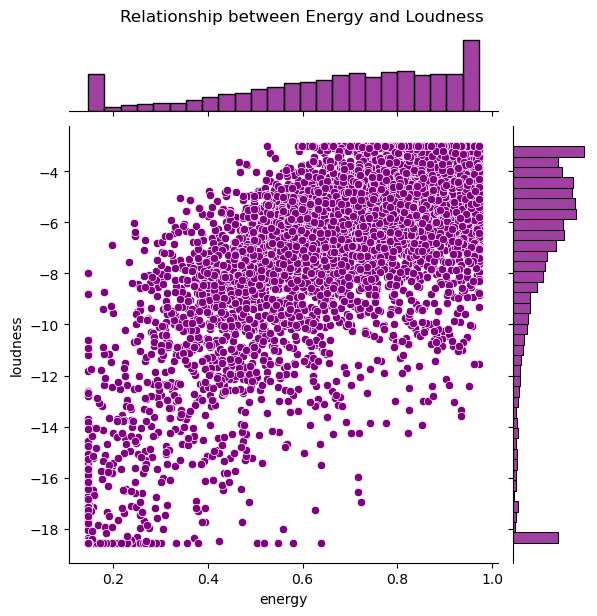

In [29]:
sns.jointplot(x='energy', y='loudness', data=df, kind='scatter', height=6, color='purple')
plt.suptitle("Relationship between Energy and Loudness", y=1.02)
plt.show()

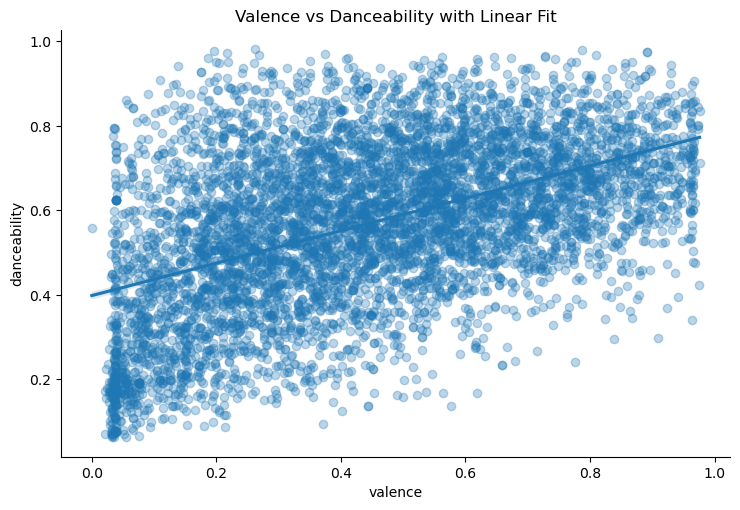

In [30]:
sns.lmplot(x='valence', y='danceability', data=df, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("Valence vs Danceability with Linear Fit")
plt.show()

In [ ]:
### Phase 4: Preprocessing

In [31]:
# - Feature scaling
from sklearn.preprocessing import StandardScaler

# Sayısal sütunlar (modelə daxil edəcəyin)
num_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

In [32]:
# - Categorical encoding
# Sadə halda One-hot Encoding
df_encoded = pd.get_dummies(df_scaled, columns=['track', 'artist', 'uri'], drop_first=True)

In [36]:
df_encoded.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri_spotify:track:7zGcnkHnMpileiI0H0aIgc,uri_spotify:track:7zLYKWcXnYeHHWidalz7rj,uri_spotify:track:7zNM46fo01dCBidY4yGNTZ,uri_spotify:track:7zOoHxDt1duHL8czY7o7ab,uri_spotify:track:7zVCrzzEJU7u24sbJPXA5W,uri_spotify:track:7zY8Ra36GZoYJe65W6kcwM,uri_spotify:track:7zbFh74zImpQho3btxuANN,uri_spotify:track:7zmJyZL3DfYBBYbY8Rve6W,uri_spotify:track:7zsXy7vlHdItvUSH8EwQss,uri_spotify:track:7zy6jG8RIUI8qNYYVuLGbY
0,0.903699,-0.198259,1,0.621174,0,-0.064971,-0.667150,-0.782990,-0.788843,1.066643,...,False,False,False,False,False,False,False,False,False,False
1,-0.635187,-1.849701,5,-1.875771,0,-0.719259,2.248070,1.605971,-0.700155,-0.788585,...,False,False,False,False,False,False,False,False,False,False
2,-0.096053,-1.117664,9,0.181701,0,-0.508433,-0.184135,-0.782990,-0.599443,-0.690941,...,False,False,False,False,False,False,False,False,False,False
3,-0.347300,-0.102397,0,0.399787,0,-0.499951,-0.718090,-0.782990,0.122079,-0.621777,...,False,False,False,False,False,False,False,False,False,False
4,1.249164,0.939014,1,0.858301,1,2.193536,-0.722611,-0.782990,1.527545,1.367710,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# - Feature selection
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Aşağı dəyişkənliyi olanları atır
df_selected = selector.fit_transform(df_scaled[num_features])

In [34]:
df_selected

array([[ 0.90369946, -0.19825916,  0.62117354, ..., -0.78884252,
         1.06664273, -0.47872377],
       [-0.63518708, -1.84970117, -1.87577078, ..., -0.7001554 ,
        -0.78858506,  1.11769581],
       [-0.09605336, -1.11766355,  0.18170118, ..., -0.5994429 ,
        -0.69094149,  1.67526537],
       ...,
       [ 0.78854468,  0.57735212,  0.683375  , ..., -0.3664513 ,
         0.65572605, -0.07608698],
       [ 0.16566204, -2.15471684, -2.23349265, ..., -0.29129272,
         0.47264436, -0.07504422],
       [-2.34157146, -2.28543784, -2.86413929, ..., -0.63702219,
        -1.68487165, -0.91086036]])

In [35]:
# - Train/test split
from sklearn.model_selection import train_test_split

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### Phase 5: Handle Imbalanced Data

target
0    3196
1    3195
Name: count, dtype: int64


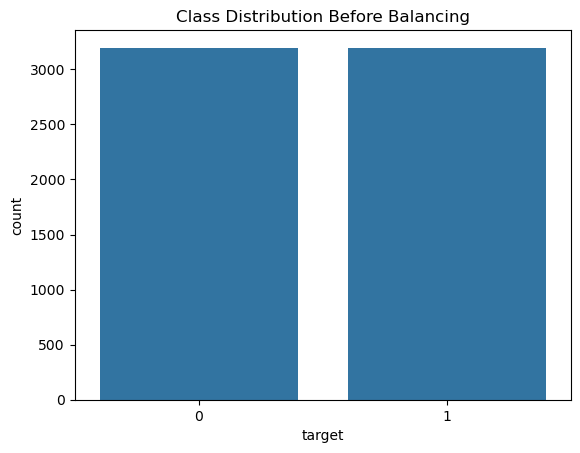

In [37]:
# - Apply SMOTE or similar technique
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title("Class Distribution Before Balancing")
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE

# Balanslaşdırmadan əvvəl features və target ayırılır
X = df.drop('target', axis=1)
y = df['target']

smote = SMOTE(random_state=42)
X = X.select_dtypes(exclude='object')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [40]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

target
1    3196
0    3196
Name: count, dtype: int64


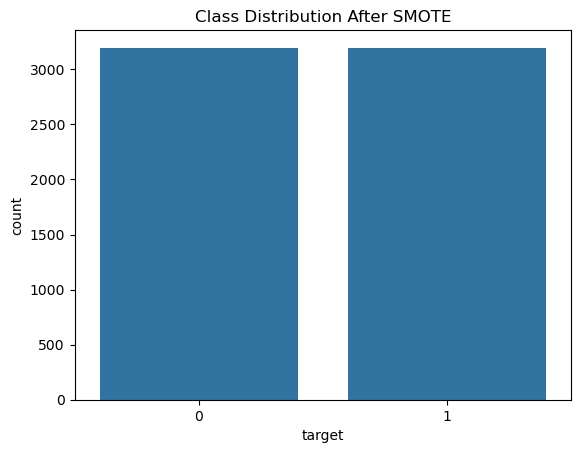

In [41]:
# - Check class distribution after balancing
import pandas as pd

print(pd.Series(y_resampled).value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

In [ ]:
### Phase 6: Model Development

In [ ]:
# - Try multiple algorithms

In [51]:
# - Cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "LogReg": make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier())
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='f1')
    print(f"{name}: Mean F1 = {scores.mean():.4f} | Std = {scores.std():.4f}")

LogReg: Mean F1 = 0.8280 | Std = 0.0041
RandomForest: Mean F1 = 0.8536 | Std = 0.0020


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [53]:
# - Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_resampled, y_resampled)

print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Params: {'max_depth': 20, 'n_estimators': 100}
Best F1 Score: 0.8504119195388669


In [ ]:
# - Model comparison
results = []

for name, model in models.items():
    f1 = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='f1').mean()
    accuracy = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy').mean()
    results.append({"Model": name, "F1 Score": f1, "Accuracy": accuracy})

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

In [ ]:
### Phase 7: Evaluation

In [55]:
# - Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Modeli train-test datası ilə sınaqdan keçirmək (misal üçün Random Forest)
model = RandomForestClassifier(random_state=42)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # ROC AUC üçün ehtimal

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8483189992181391
Precision: 0.8093841642228738
Recall: 0.8961038961038961
F1 Score: 0.8505392912172574
ROC AUC: 0.915967610820552


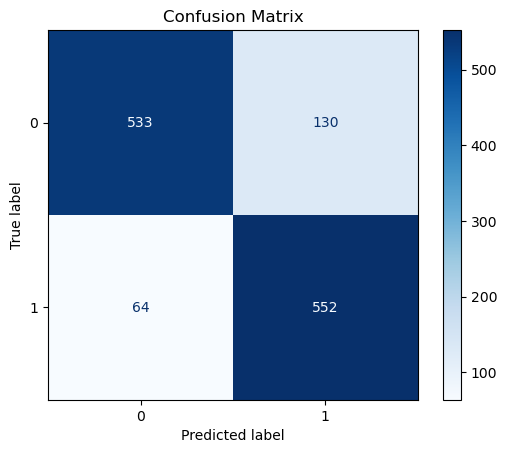

In [56]:
# - Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

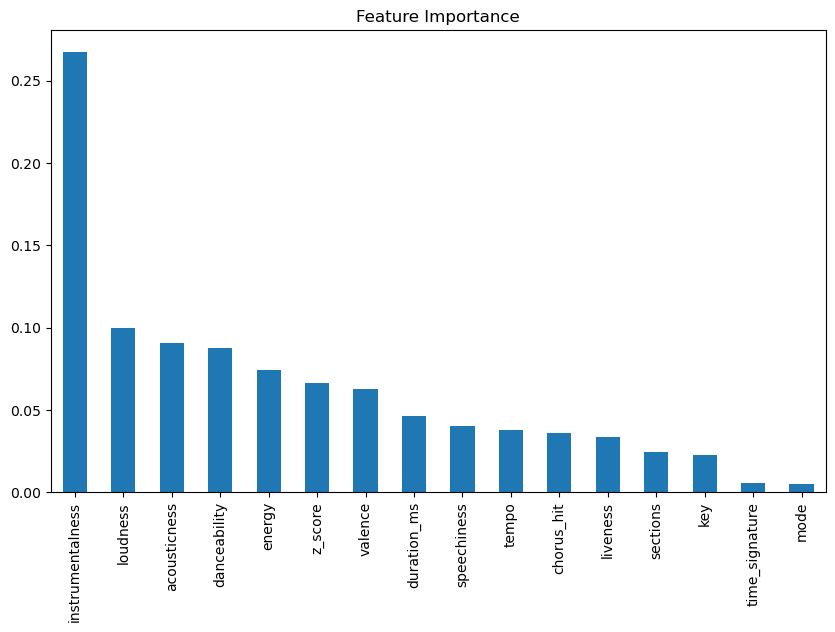

In [57]:
# - Feature importance
importances = model.feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

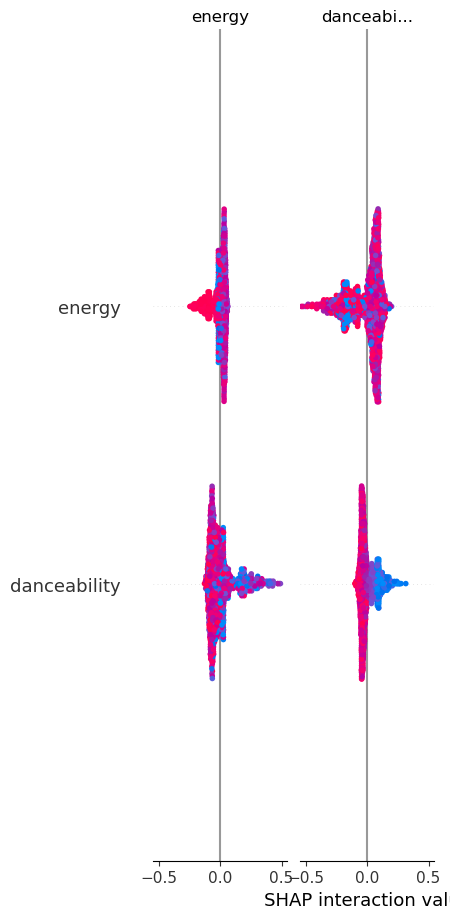

In [63]:
# - Model interpretation
import shap

# SHAP analizini sürətləndirmək üçün TreeExplainer istifadə olunur
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)

In [ ]:
### Phase 8: Visualization & Reporting

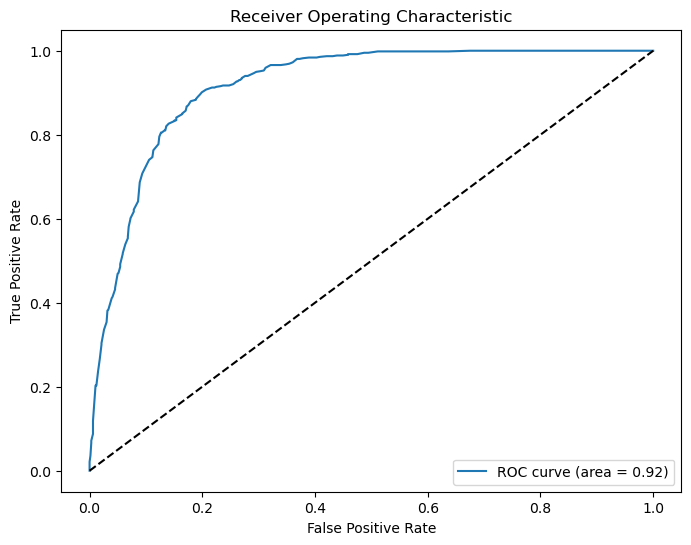

In [61]:
# - Create visualizations
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# - Summary of findings
# - Model recommendations
# README